In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
from matplotlib import cm
from scipy.linalg import issymmetric
import networkx as nx

from functions import *

#plotting
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 24})

In [2]:
# Generate undirected Watts-Strogatz graph from networkx
N = 100
K = 5
p = 0.1
G1 = nx.watts_strogatz_graph(N,K,p)
adj = nx.adjacency_matrix(G1); adj = adj.toarray()

/tmp/ipykernel_20917/1918033568.py:6: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj = nx.adjacency_matrix(G1); adj = adj.toarray()


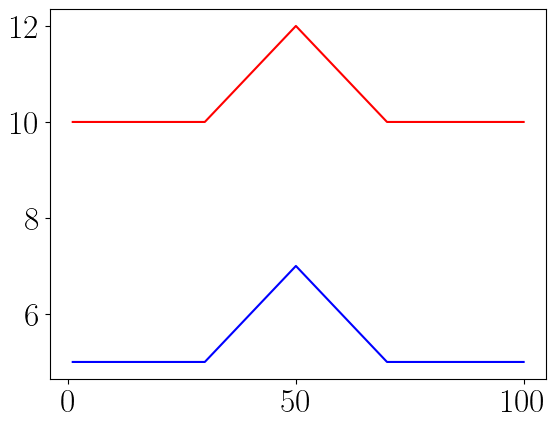

In [9]:
# Setup
nodes = np.arange(1,len(adj)+1)

# Brusselator parameters
#D = [1, 7]
#wave1 = 1 + 0.2*np.sin(nodes/5)
#wave2 = 2 - wave1

# Mimura-Murray parameters
D = [1, 0.0125]
wave1 = np.maximum(5, 7 - np.abs(nodes - 50)/10)
wave2 = wave1 + 5

# Fitzhugh-Nagumo parameters
#D = [0.2, 15]
#wave1 = 0.08 + 0.02*np.sin(nodes/5)
#wave2 = 0.16 - wave1

init = np.hstack(( wave1, wave2 ))
tspan = np.arange(0,100,0.01)
plt.plot(nodes,wave1,'b')
plt.plot(nodes,wave2,'r')

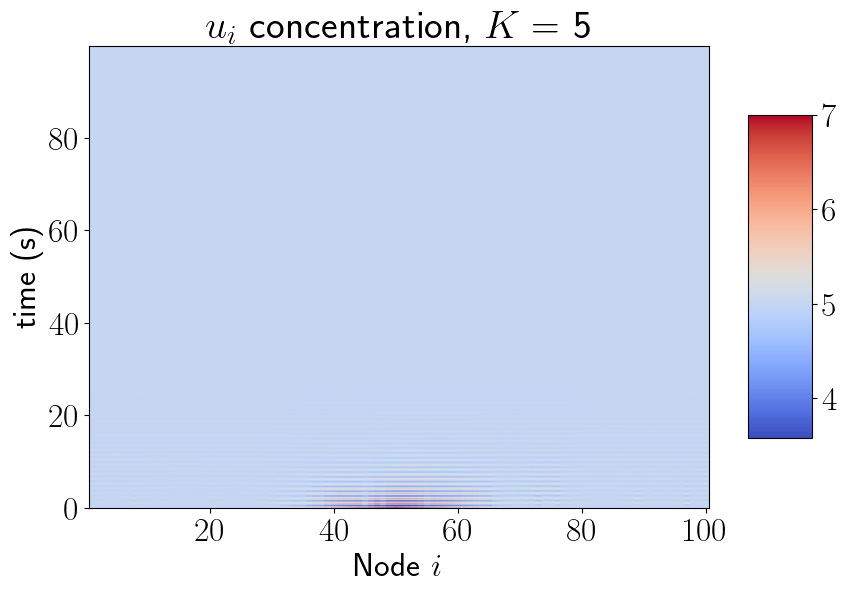

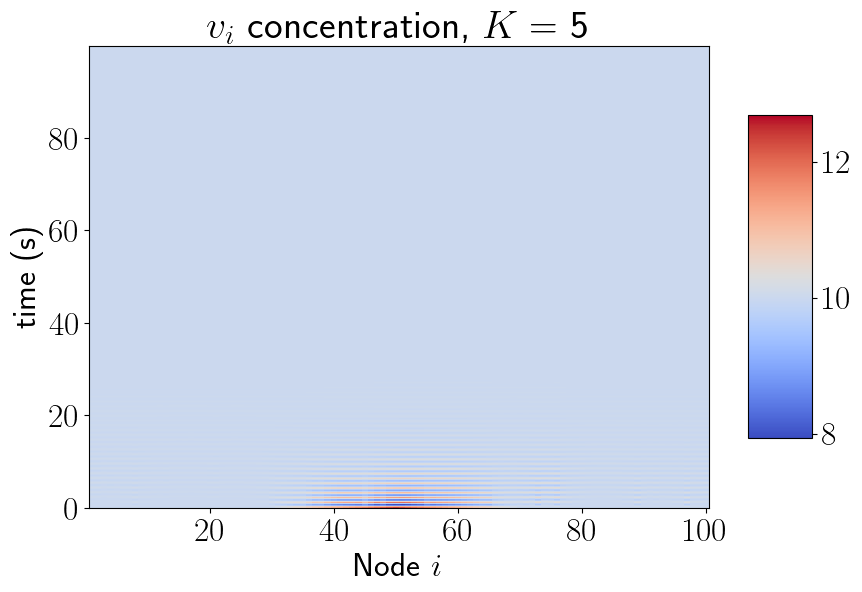

In [10]:
sol = simulate_rdm(adj, MimuraMurray, D, init, tspan, K)

p =  0.0


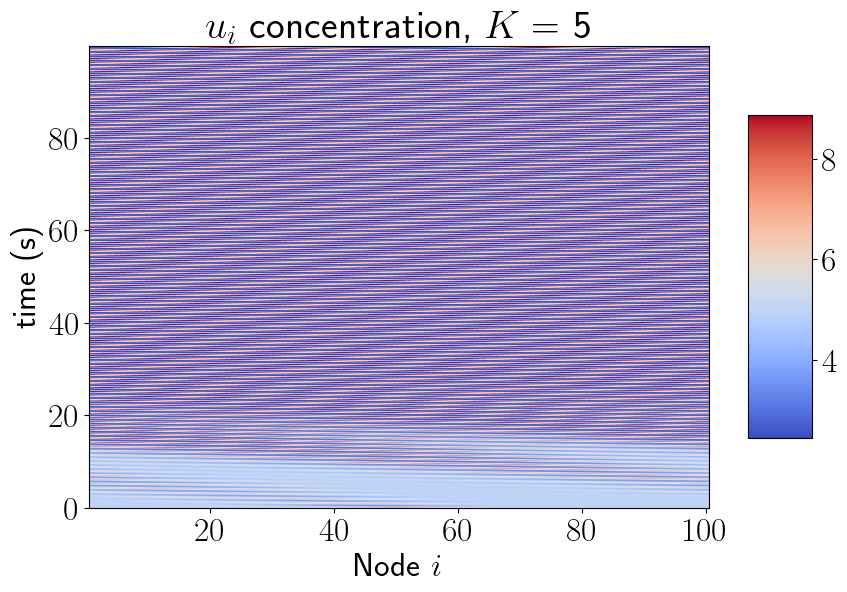

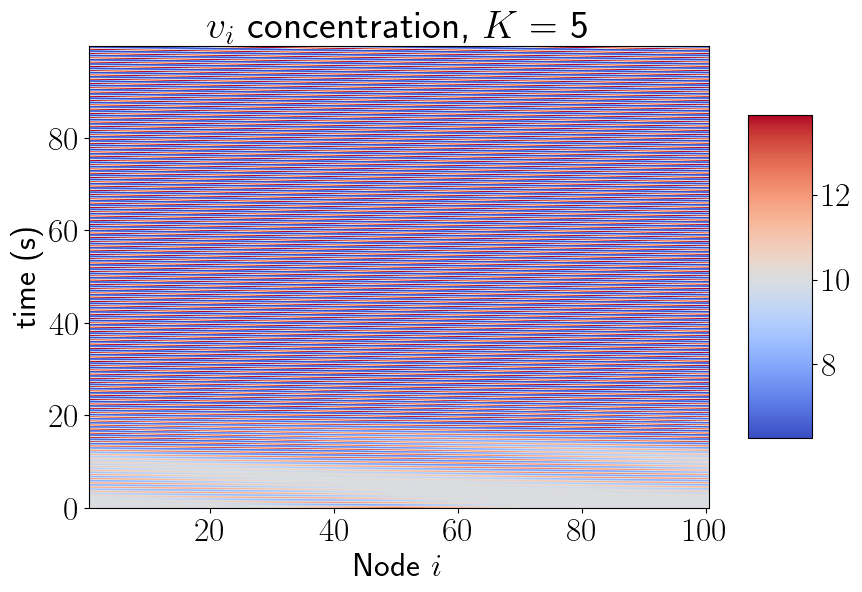

p =  0.1


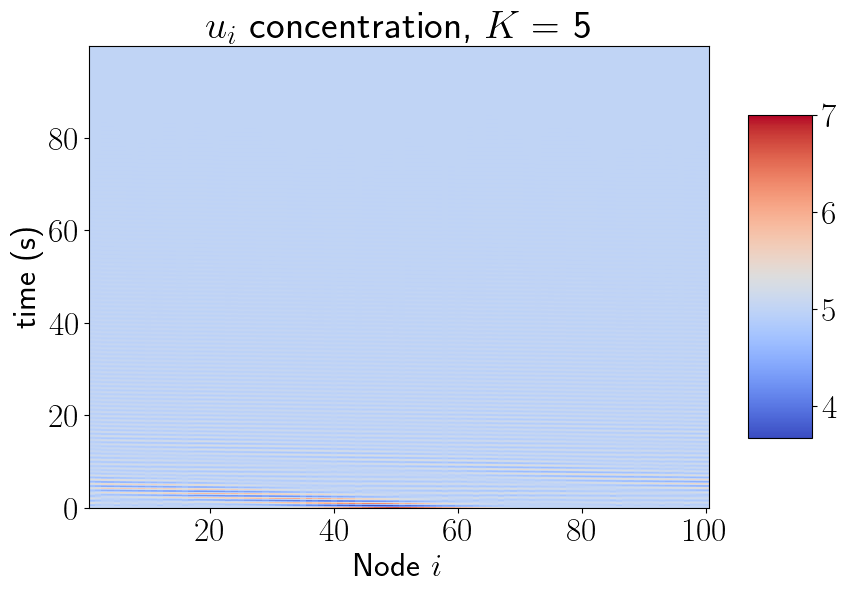

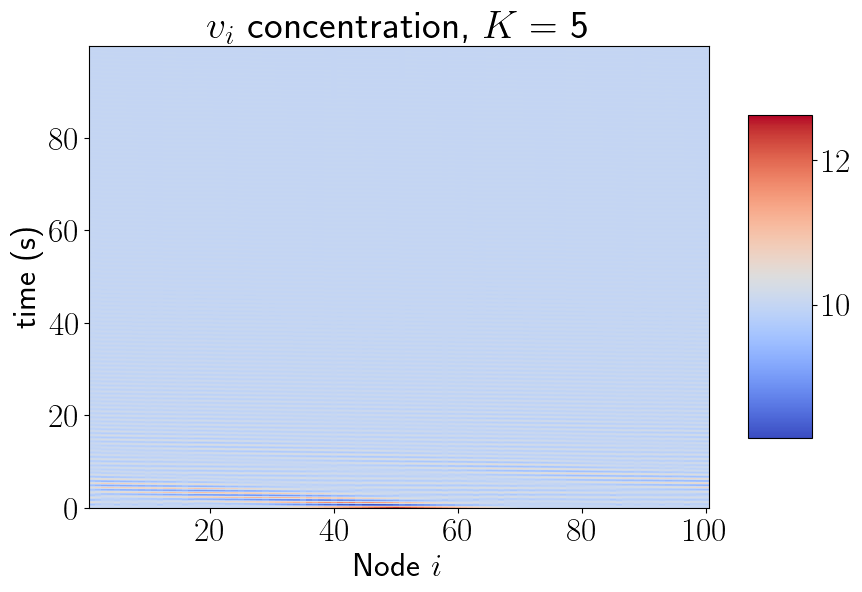

p =  0.2


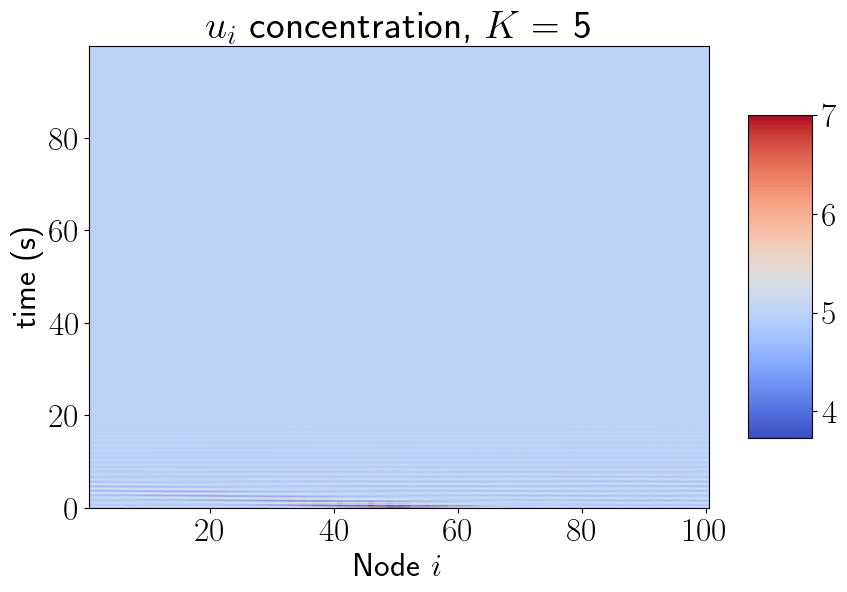

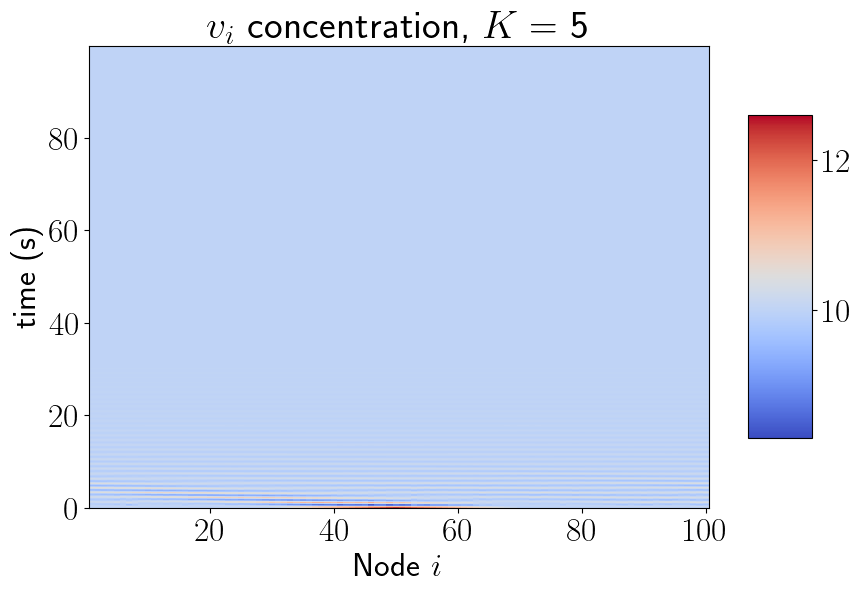

p =  0.3


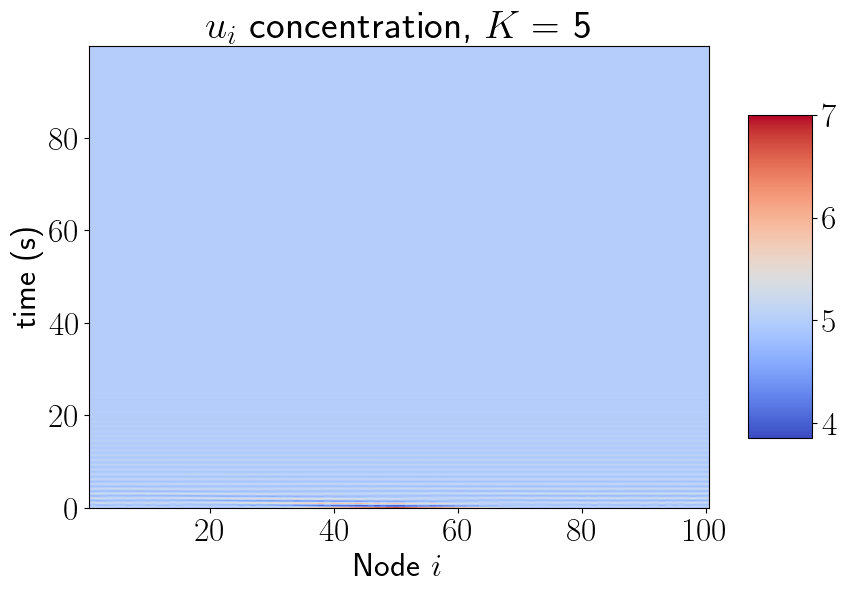

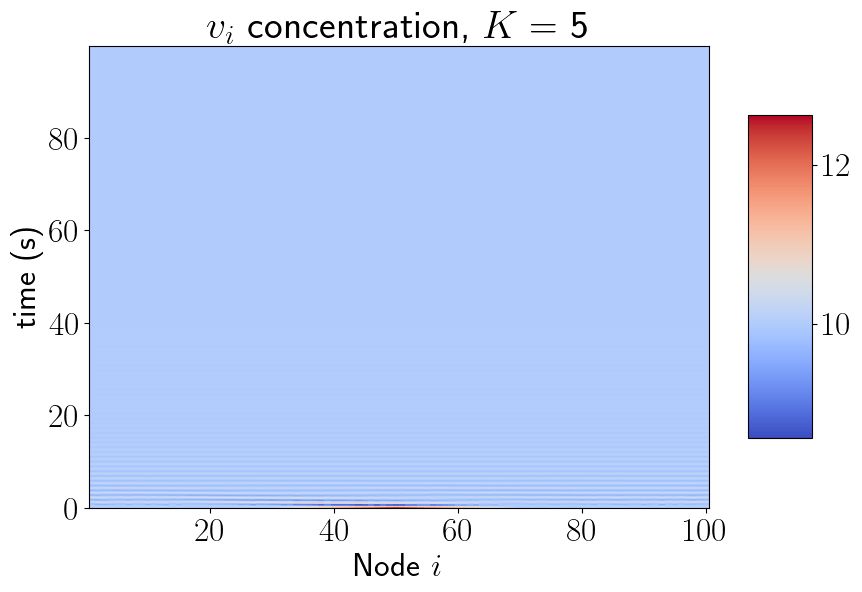

p =  0.4


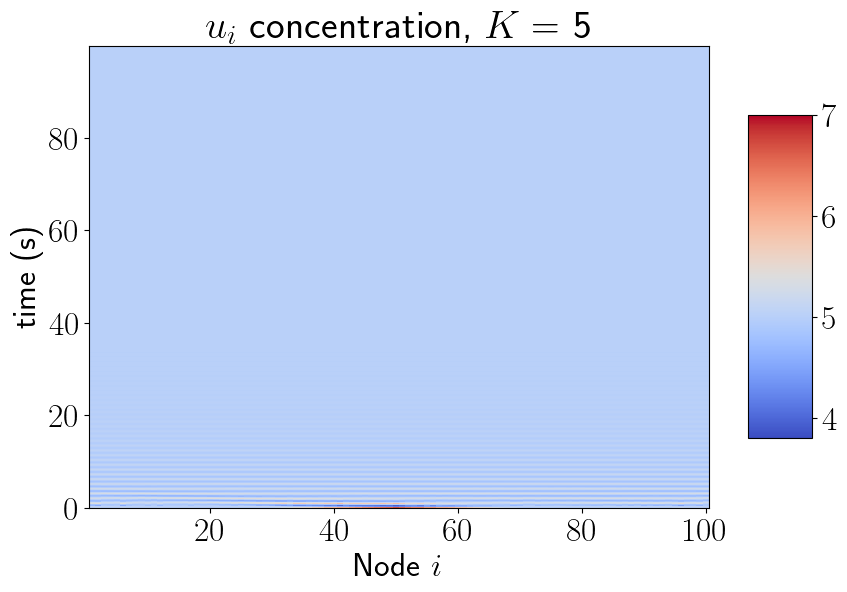

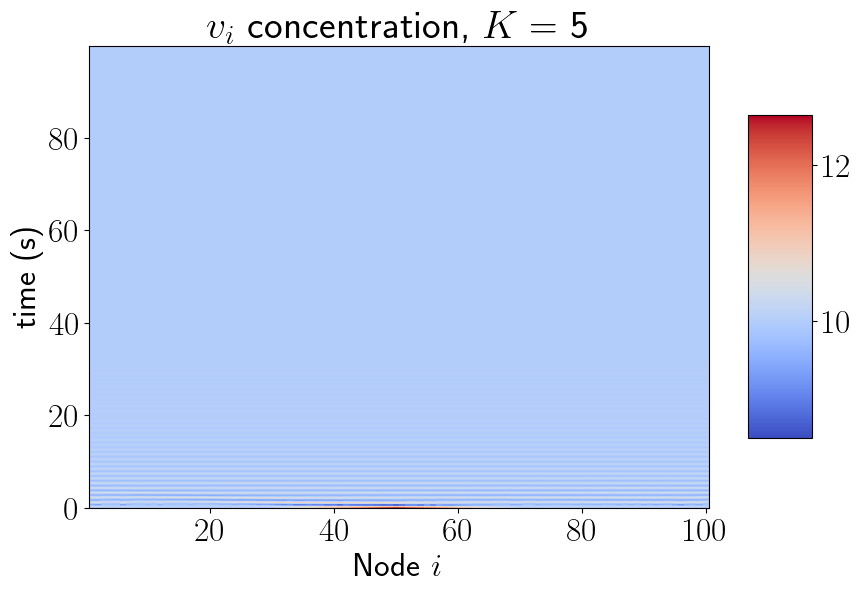

p =  0.5


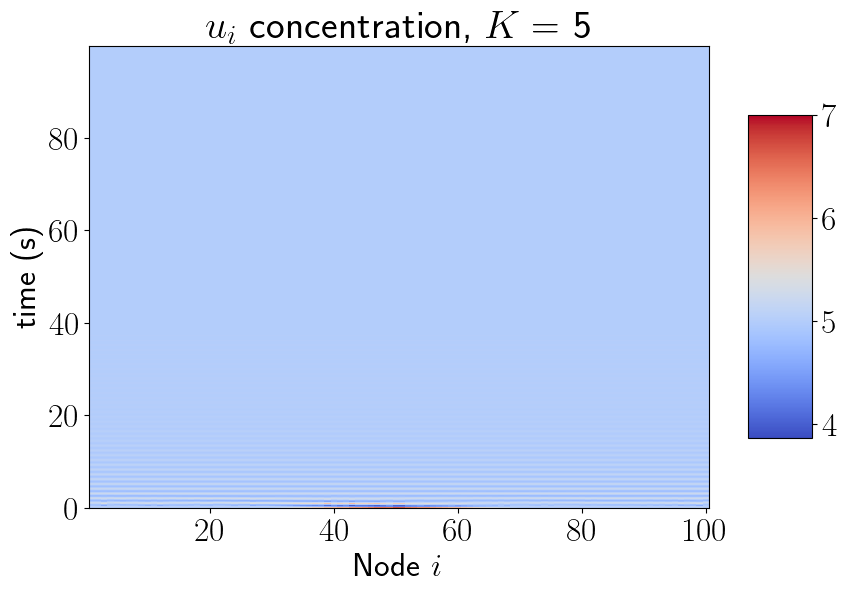

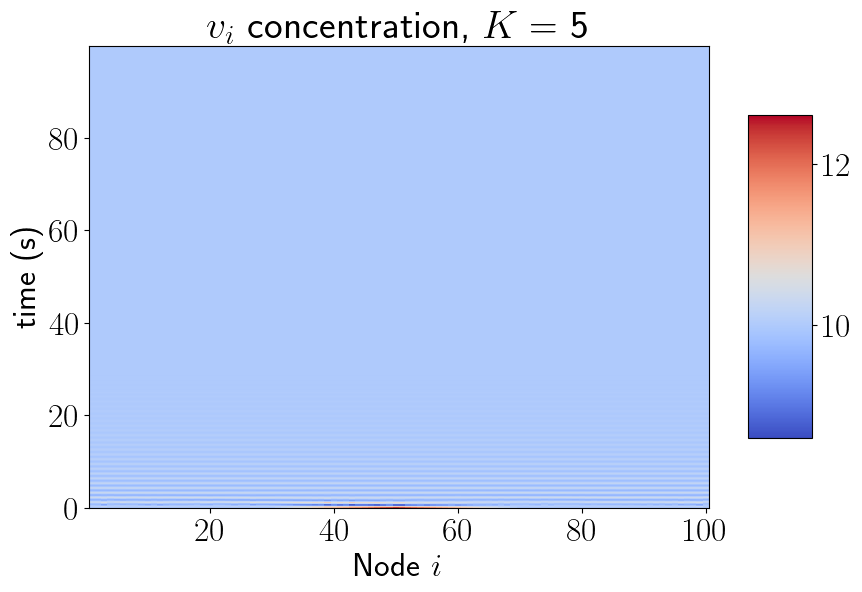

In [11]:
# fixing K = 10, varying p
for i in range(6):
    print('p = ', i/10)
    sol = simulate_rdm(Newman_Watts_generator(N, 5, i/10), MimuraMurray, D, init, tspan, 5)

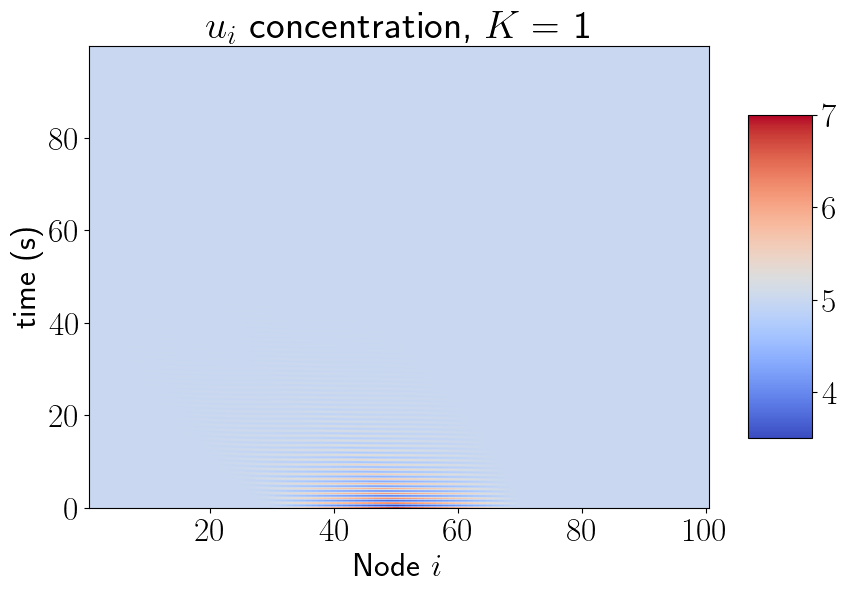

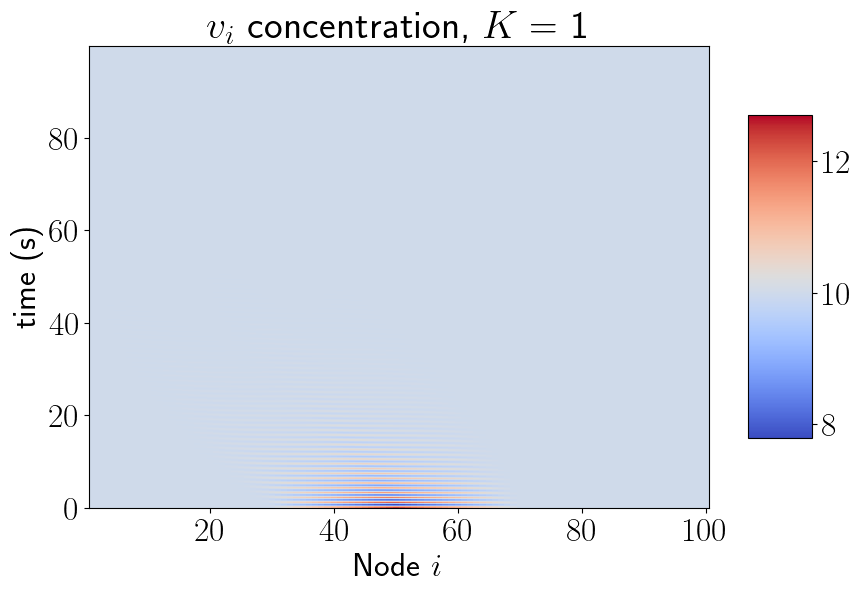

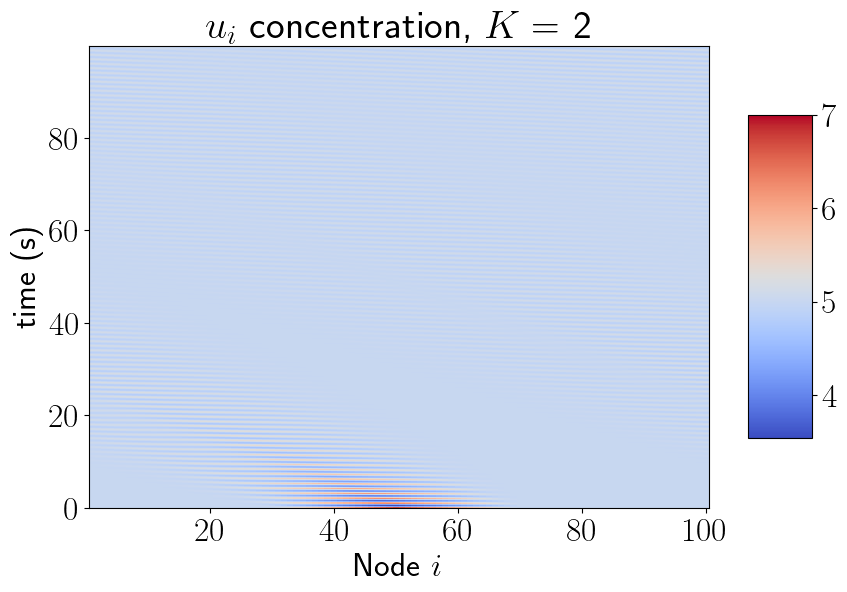

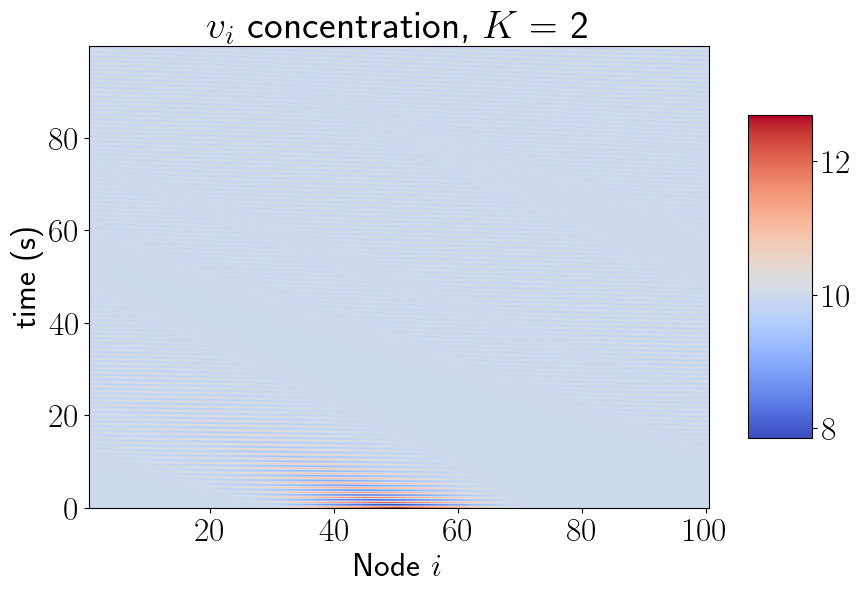

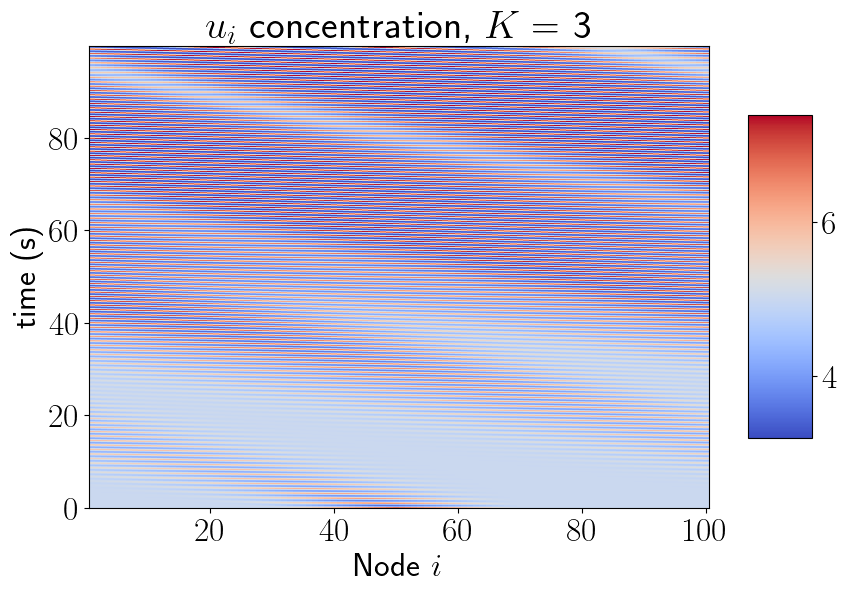

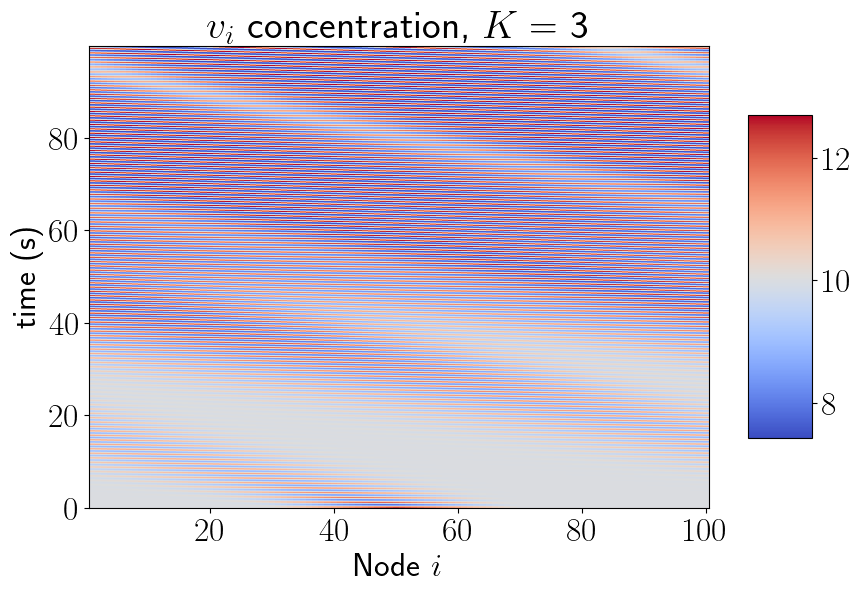

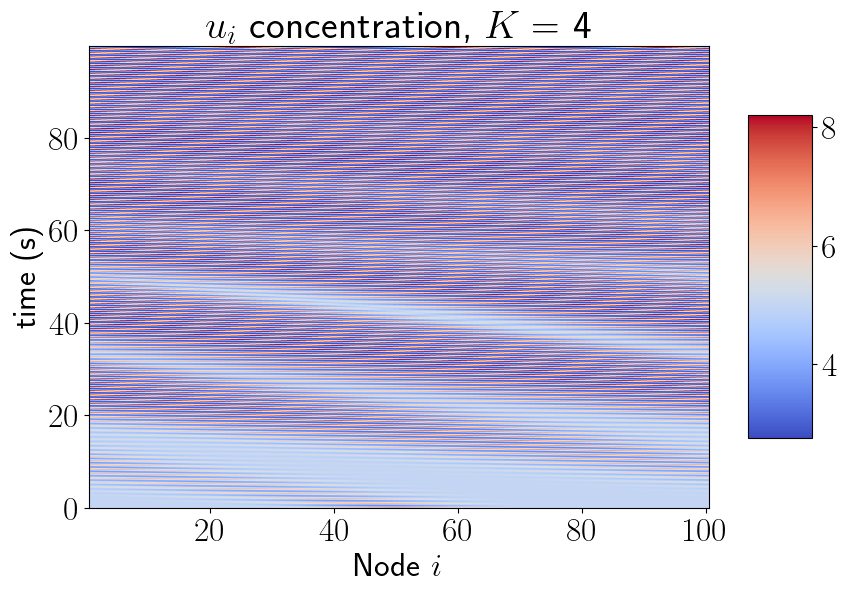

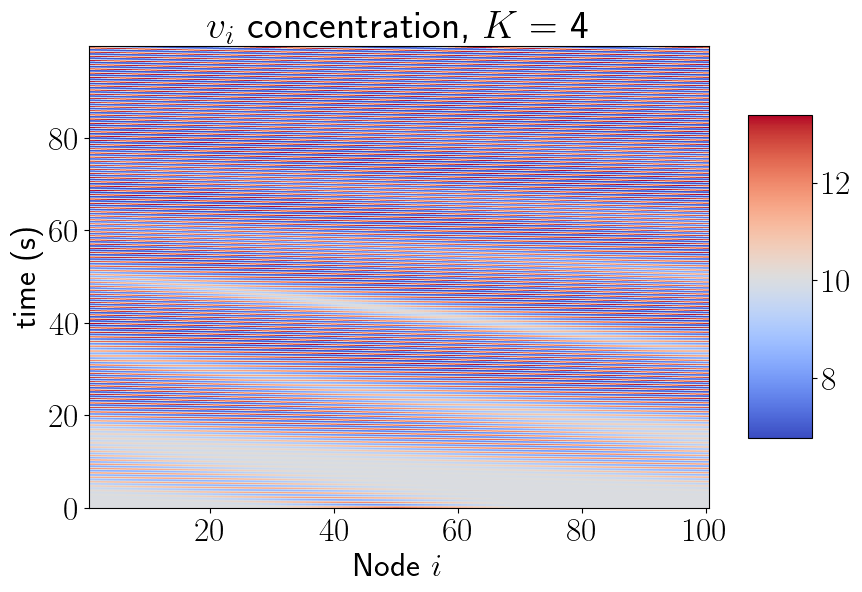

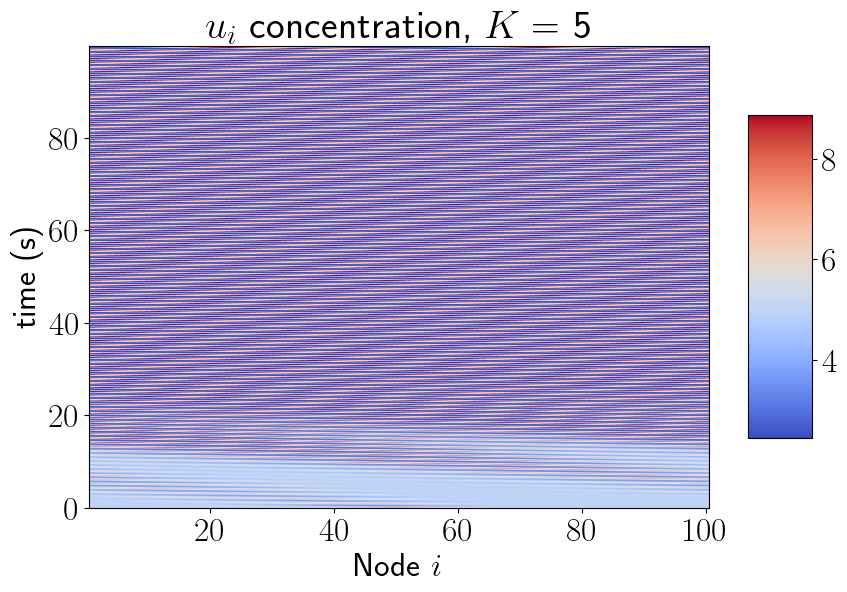

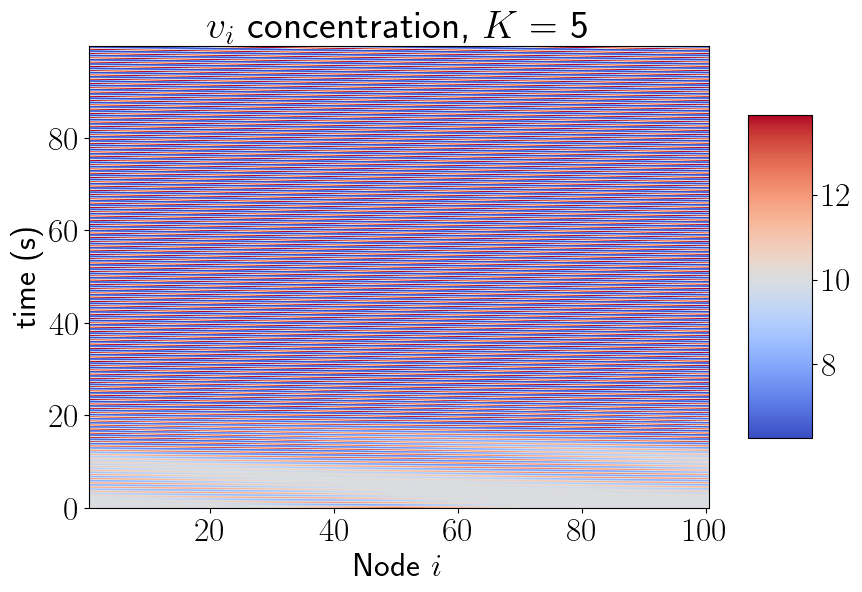

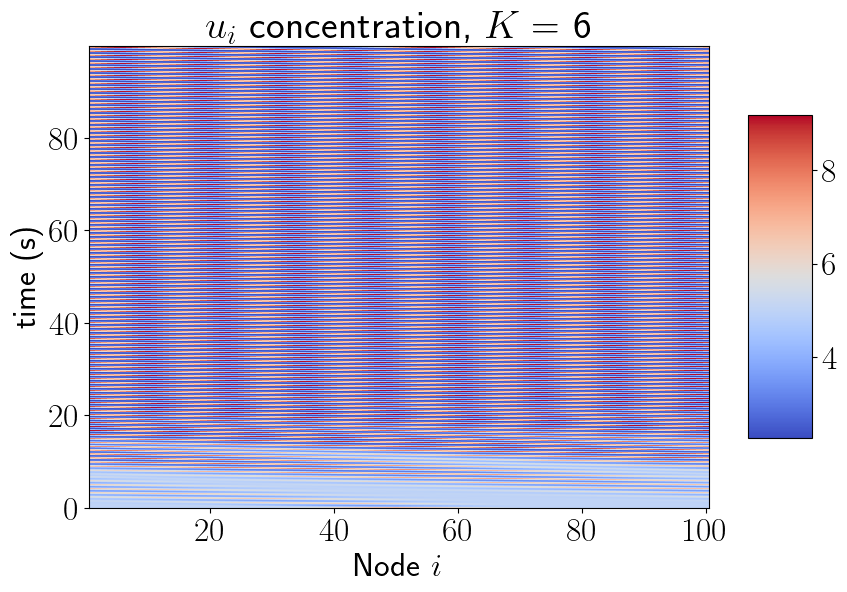

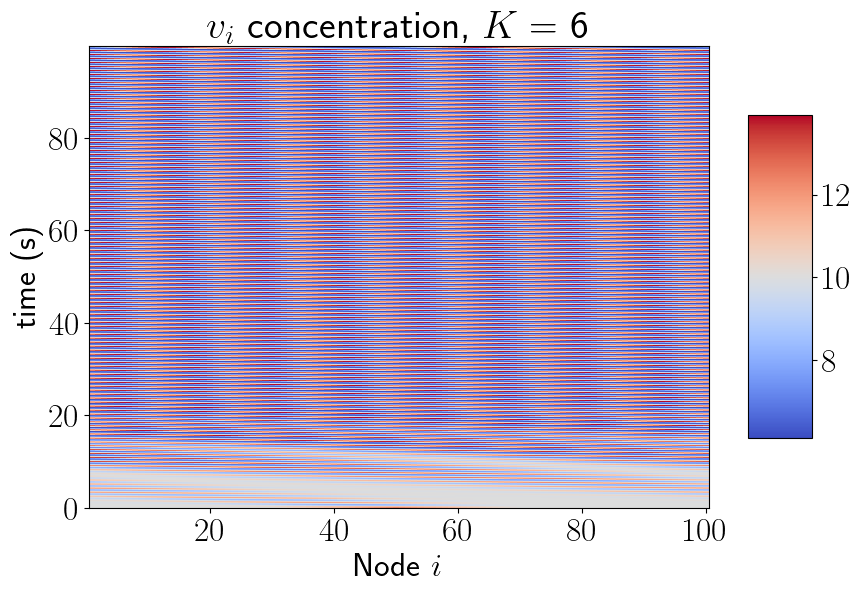

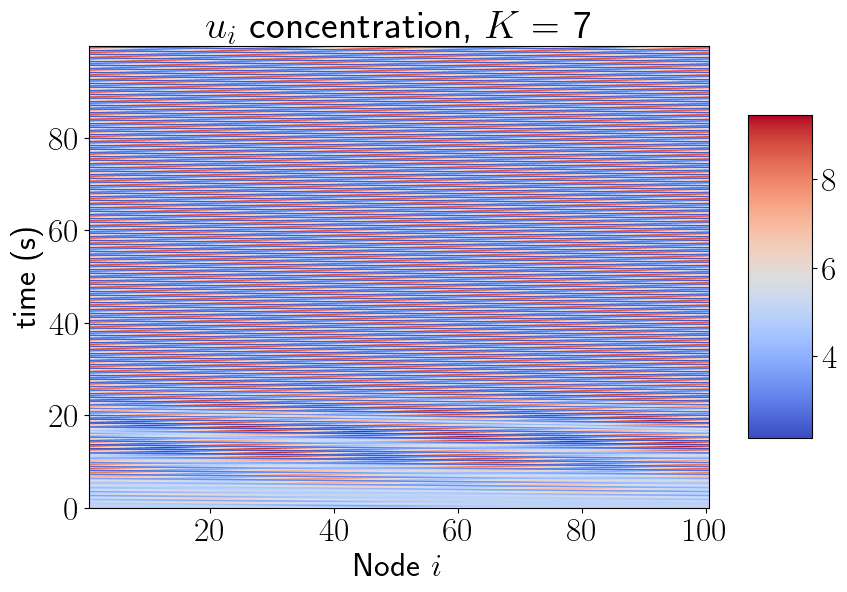

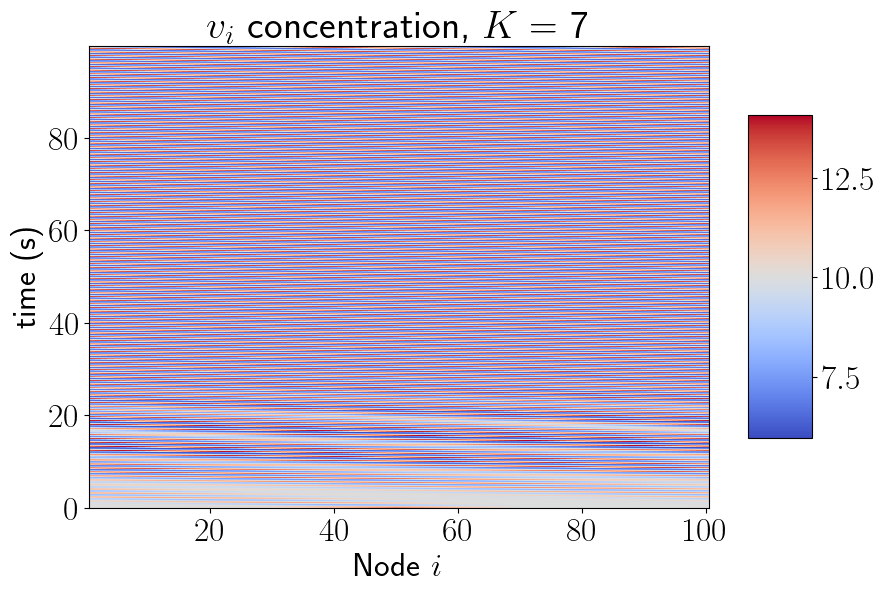

In [13]:
# fixing p = 0.1, varying K
for i in range(1,8):
    sol = simulate_rdm(Newman_Watts_generator(N, i, 0.0), MimuraMurray, D, init, tspan, i)

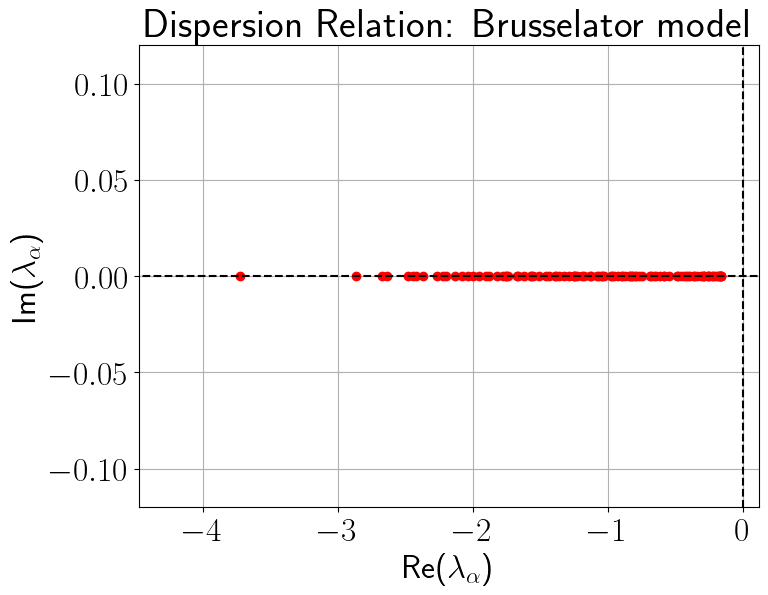

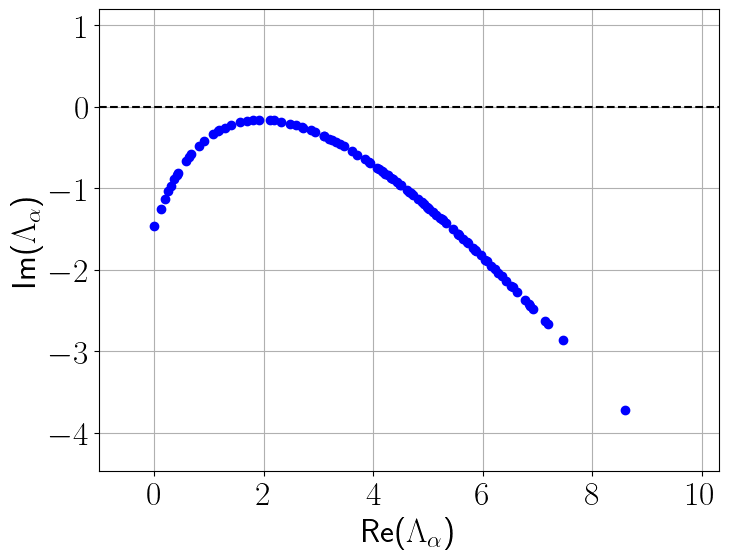

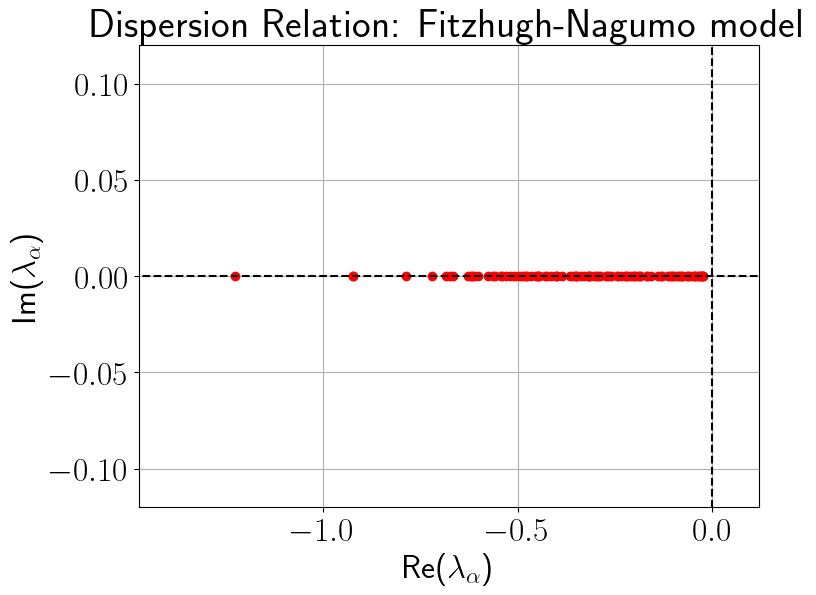

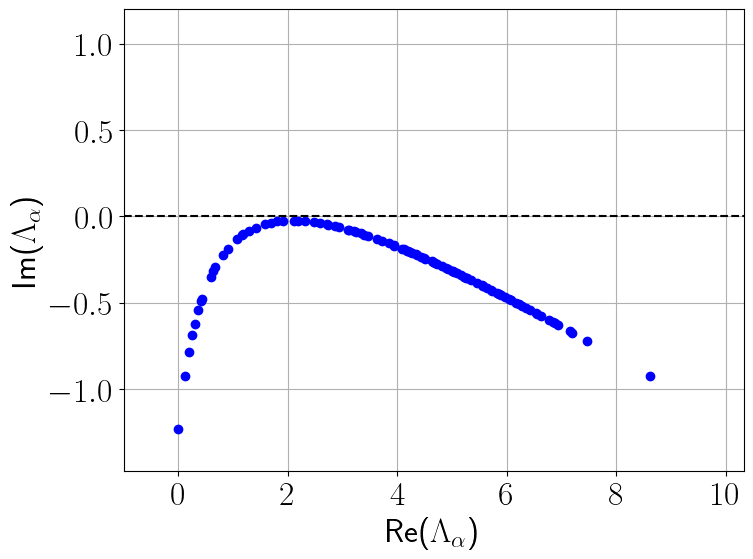

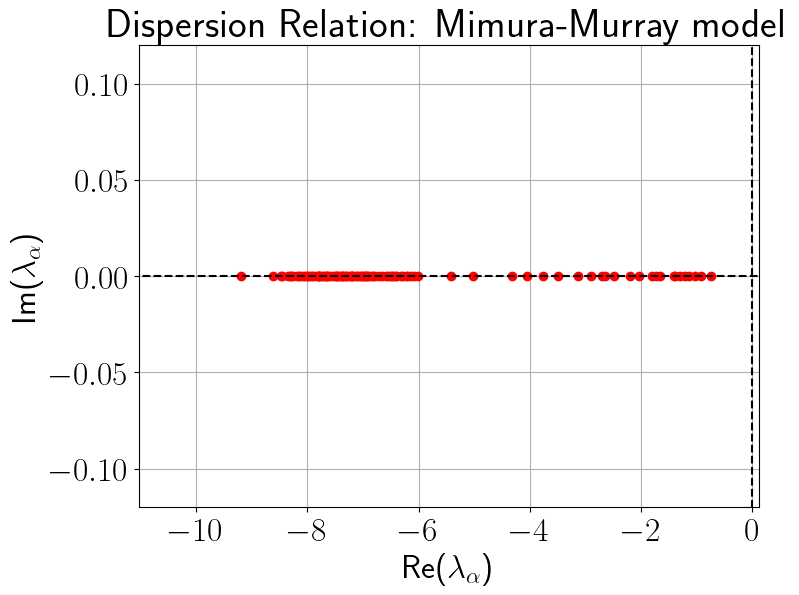

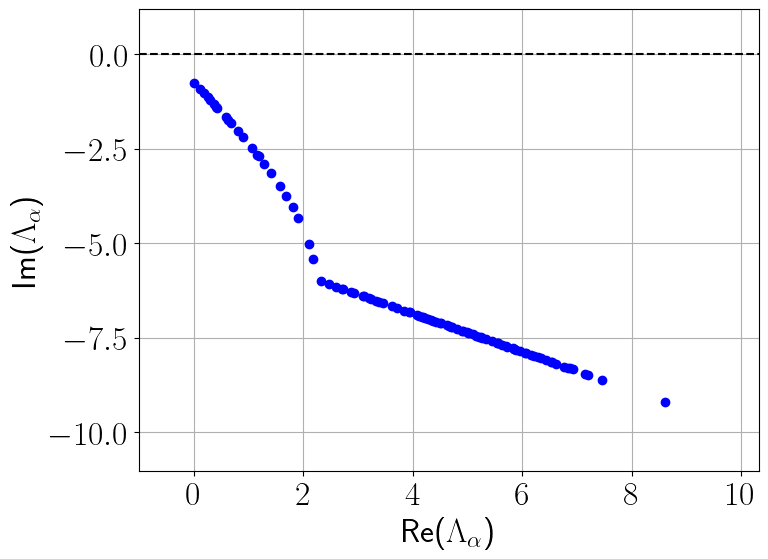

In [7]:
br = dispersion_relation(adj,'Brusselator')
fn = dispersion_relation(adj,'Fitzhugh-Nagumo')
mm = dispersion_relation(adj,'Mimura-Murray')

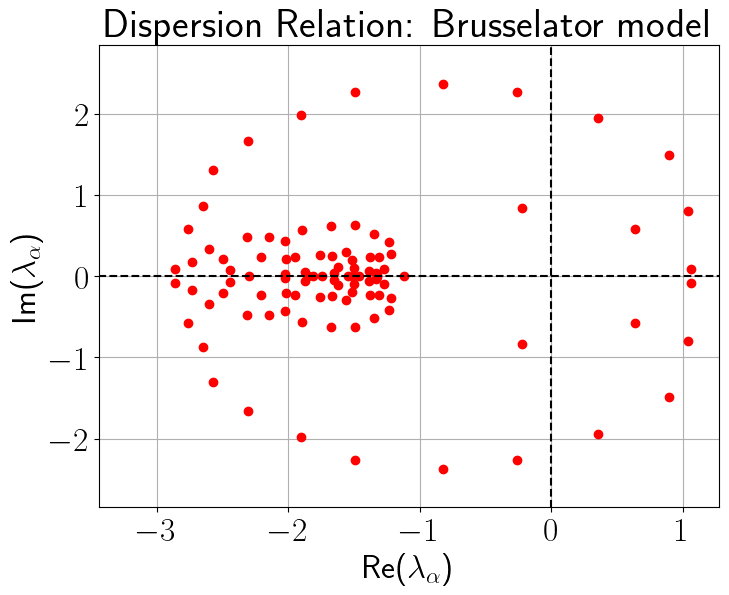

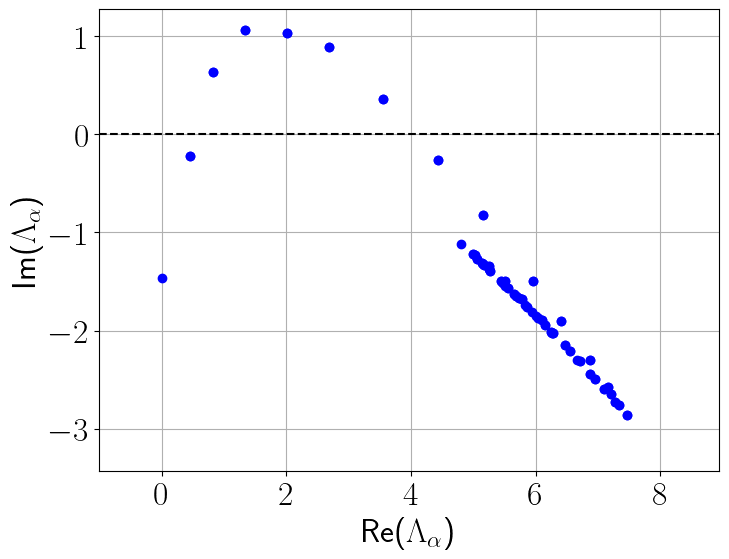

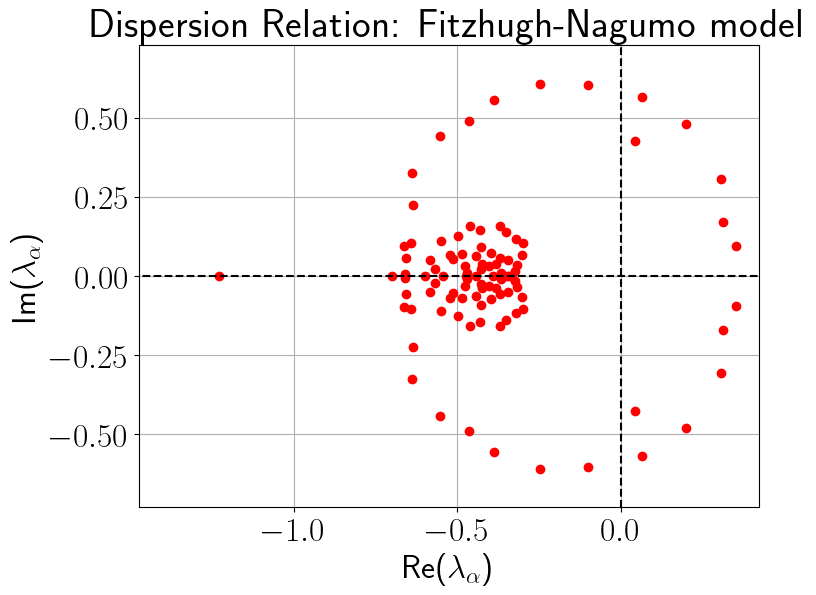

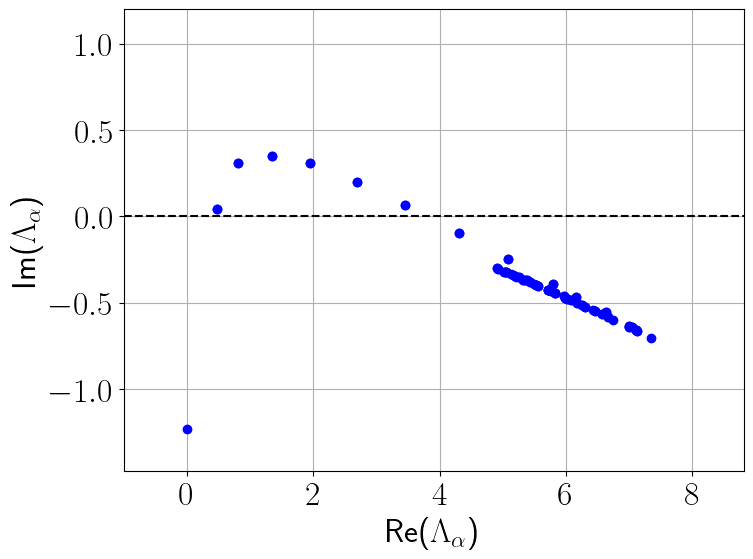

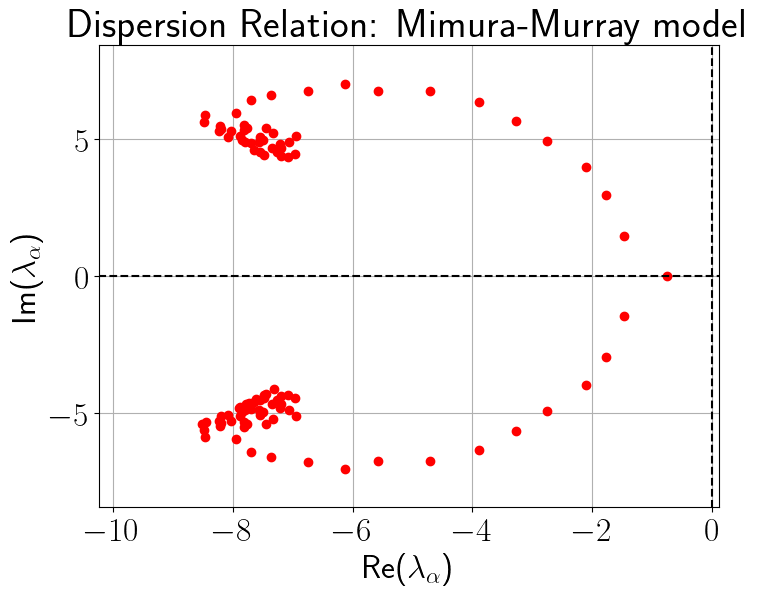

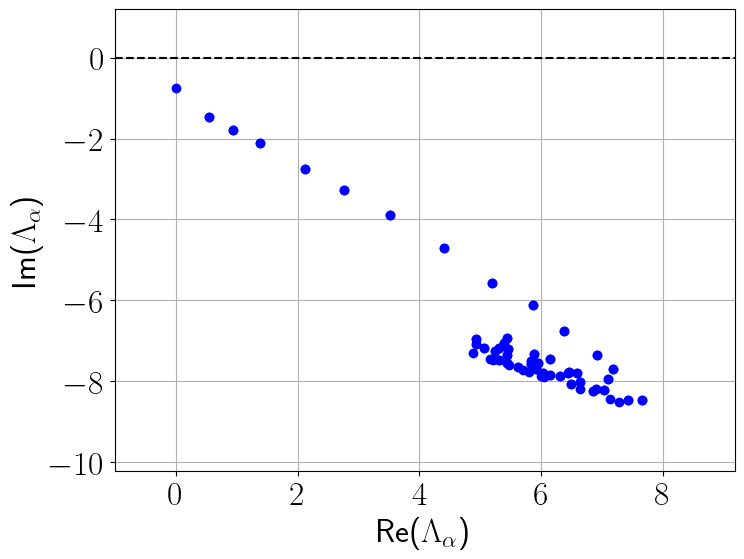

In [8]:
br = dispersion_relation(Newman_Watts_generator(100, 5, 0.1),'Brusselator')
fn = dispersion_relation(Newman_Watts_generator(100, 5, 0.1),'Fitzhugh-Nagumo')
mm = dispersion_relation(Newman_Watts_generator(100, 5, 0.1),'Mimura-Murray')